In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans,DBSCAN
import matplotlib.pyplot as plt 

In [2]:
crime=pd.read_csv("C:\ExcelR\Assignments\\Assignmnet 7\\crime_data.csv")

In [3]:
crime.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crimes=crime.iloc[:,1:]

In [5]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [6]:
crimes.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [7]:
crimes.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [8]:
df=crimes.iloc[:,:].values

In [9]:
x=MinMaxScaler().fit_transform(df)

# Hierarchical Clustering

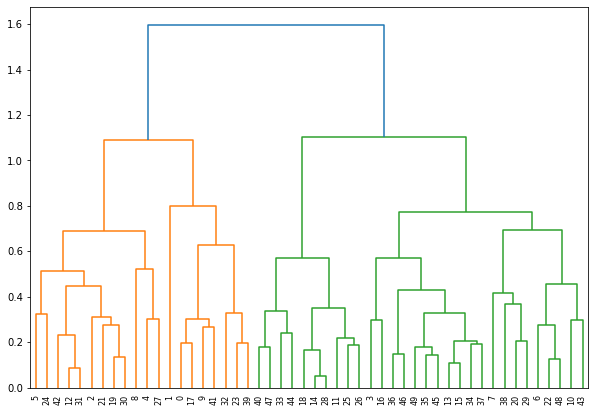

In [10]:
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(x, method='complete'))

In [11]:
hc=AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage='complete')

In [12]:
clusters_hc=hc.fit_predict(x)

In [13]:
md=pd.Series(clusters_hc)  
crimes['clusters_hc']=md
crimes.head(5)

,Murder,Assault,UrbanPop,Rape,clusters_hc
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,4
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1


In [14]:
crimes.clusters_hc.value_counts()

0    20
1    12
2    10
3     7
4     1
Name: clusters_hc, dtype: int64

In [15]:
crimes.groupby('clusters_hc').agg(['mean']).reset_index()

,clusters_hc,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.715000,132.300000,70.800000,18.100000
1,1,10.883333,256.916667,78.333333,32.250000
2,2,3.180000,78.700000,49.300000,11.630000
3,3,14.671429,251.285714,54.285714,21.685714
4,4,10.000000,263.000000,48.000000,44.500000


from this clustering info cluster 2 is least crime rates having cities

# Kmeans Clustering

In [16]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Murder       50 non-null     float64
 1   Assault      50 non-null     int64  
 2   UrbanPop     50 non-null     int64  
 3   Rape         50 non-null     float64
 4   clusters_hc  50 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.1 KB


In [18]:
crimes_km=crimes.drop(['clusters_hc'],axis=1)

In [19]:
crimes_km.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


C:\Users\shreeram kulkarni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


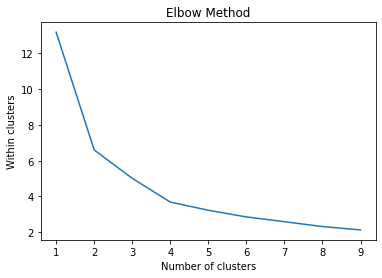

In [21]:
within_clusters=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x)
    within_clusters.append(kmeans.inertia_)
    
plt.plot(range(1,10),within_clusters)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within clusters')
plt.show()

Here for k=4 within clusters distance is optimul therefor we will go for k=4

In [22]:
clusters_km=KMeans(4,random_state=10)
clusters_km.fit(x)

KMeans(n_clusters=4, random_state=10)

In [23]:
crimes_km['cluster_km']=clusters_km.labels_

In [24]:
crimes_km.head(5)

,Murder,Assault,UrbanPop,Rape,cluster_km
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,2


In [25]:
crimes_km.cluster_km.value_counts()

3    17
1    13
2    12
0     8
Name: cluster_km, dtype: int64

In [26]:
crimes_km.groupby('cluster_km').agg(['mean']).reset_index()

,cluster_km,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,3.600000,78.538462,52.076923,12.176923
2,2,10.966667,264.000000,76.500000,33.608333
3,3,5.852941,141.176471,73.647059,19.335294


Here most of the time cluster=2 will conatin those cities which will have higher crime rates in all aspects,

Whereas cluster=1 will contain those cities which will have lower crime rates

# DBSCAN Clustering

In [27]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Murder       50 non-null     float64
 1   Assault      50 non-null     int64  
 2   UrbanPop     50 non-null     int64  
 3   Rape         50 non-null     float64
 4   clusters_hc  50 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.1 KB


In [28]:
crimes_db=crimes.drop(['clusters_hc'],axis=1)

In [29]:
crimes_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [70]:
clusters_db=DBSCAN(eps=0.3, min_samples=5)
clusters_db.fit(x)

DBSCAN(eps=0.3)

In [71]:
crimes_db['clusters_db']=clusters_db.labels_

In [72]:
crimes_db.head()

,Murder,Assault,UrbanPop,Rape,clusters_db
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,-1


In [73]:
crimes_db.clusters_db.value_counts()

 1    31
-1    14
 0     5
Name: clusters_db, dtype: int64

In [74]:
crimes_db.groupby('clusters_db').agg(['mean']).reset_index()

,clusters_db,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,10.992857,271.500000,71.357143,30.485714
1,0,14.720000,232.600000,58.200000,23.720000
2,1,5.222581,115.290323,64.096774,16.651613


according to DBSCAN there are 14 cities which are having higher crime rates compare to other cities